# Player Rating after a Cricket Match

## Batsman Rating

#### Importing all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('match.csv') # Reading the dataset

In [3]:
df.head() # Extracting the top 5 rows of the dataframe!

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.1,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.2,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.3,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.4,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.5,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info() # Getting the info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                542 non-null    int64  
 1   season                  542 non-null    int64  
 2   start_date              542 non-null    object 
 3   venue                   542 non-null    object 
 4   innings                 542 non-null    int64  
 5   ball                    542 non-null    float64
 6   batting_team            542 non-null    object 
 7   bowling_team            542 non-null    object 
 8   striker                 542 non-null    object 
 9   non_striker             542 non-null    object 
 10  bowler                  542 non-null    object 
 11  runs_off_bat            542 non-null    int64  
 12  extras                  542 non-null    int64  
 13  wides                   12 non-null     float64
 14  noballs                 2 non-null      fl

In [5]:
df.describe() # Statistical info about the dataframe

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,542.0,542.0,542.000000,542.000000,542.000000,542.000000,12.000000,2.0,1.0,5.0,0.0,0.0,0.0
mean,1276909.0,2022.0,1.472325,22.005720,0.915129,0.044280,1.333333,1.0,1.0,1.0,NaN,NaN,NaN
std,0.0,0.0,0.499695,12.804588,1.398505,0.281721,1.154701,0.0,NaN,0.0,NaN,NaN,NaN
min,1276909.0,2022.0,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.0,1.0,NaN,NaN,NaN
25%,1276909.0,2022.0,1.000000,11.125000,0.000000,0.000000,1.000000,1.0,1.0,1.0,NaN,NaN,NaN
50%,1276909.0,2022.0,1.000000,22.150000,0.000000,0.000000,1.000000,1.0,1.0,1.0,NaN,NaN,NaN
75%,1276909.0,2022.0,2.000000,33.100000,1.000000,0.000000,1.000000,1.0,1.0,1.0,NaN,NaN,NaN
max,1276909.0,2022.0,2.000000,45.600000,6.000000,5.000000,5.000000,1.0,1.0,1.0,NaN,NaN,NaN


In [6]:
df.columns # Names of all columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [7]:
df.columns.nunique() # Count of unique columns

22

In [8]:
# Renaming the column names
df.rename(columns = {'batting_team':'Batting_Team', 'bowling_team':'Bowling_Team'}, \
          inplace = True)

### Checking Missing Data of the dataset

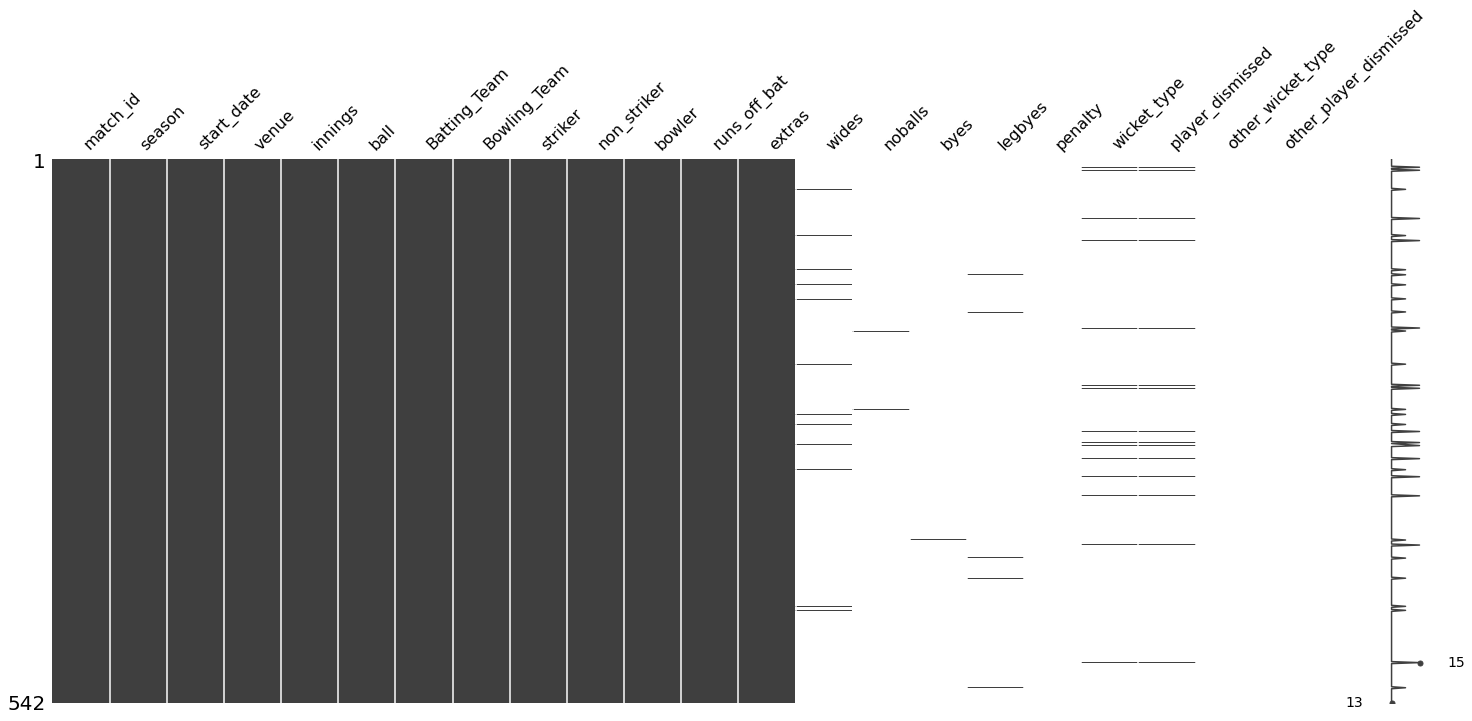

In [9]:
import missingno as msno
msno.matrix(df)
plt.show()

#### Initialising new dataframe to calculate the "Total Runs Scored" by each batsman from both teams

In [10]:
df1=df.groupby(by=['striker','Batting_Team'],as_index=False).agg({'runs_off_bat':'sum'})
df1.head() # Performed groupby to group each player and their respective country!

,striker,Batting_Team,runs_off_bat
0,BA Carse,England,3
1,BA Stokes,England,27
2,C Overton,England,32
3,DJ Willey,England,18
4,HH Pandya,India,71


#### Initialising new dataframe to calculate the "Total Balls Faced" by each batsman from both teams

In [11]:
df2=df.groupby(by=['striker','Batting_Team'],as_index=False).agg({"runs_off_bat":'count','wides':'count',"noballs":'sum'})

In [12]:
# To accurately count the number of balls faced, wides count has been removed according to laws of cricket
df2['Balls_faced']= df2['runs_off_bat']-df2['wides']

In [13]:
#Dropped the wides and noballs columns which don't make sense anymore!!!
df2.drop(['runs_off_bat','wides','noballs'],axis=1,inplace=True)
df2.head() 

,striker,Batting_Team,Balls_faced
0,BA Carse,England,7
1,BA Stokes,England,29
2,C Overton,England,33
3,DJ Willey,England,15
4,HH Pandya,India,55


#### Creating a new dataframe 'batsman' merging both df1,df2 to get runs scored and balls faced in same dataframe

In [14]:
# Merging the dataframes using merge method
batsman = pd.merge(df1,df2,on=['striker','Batting_Team'])

In [15]:
batsman.head()

,striker,Batting_Team,runs_off_bat,Balls_faced
0,BA Carse,England,3,7
1,BA Stokes,England,27,29
2,C Overton,England,32,33
3,DJ Willey,England,18,15
4,HH Pandya,India,71,55


In [16]:
# Calculating the total team score of England
batsman['England_Score'] = df[df['Batting_Team']=='England'] \
.agg({'runs_off_bat':'sum','wides':'sum','noballs':'sum','byes':'sum','legbyes':'sum'}) \
.sum().astype(int)

In [17]:
# Calculating the total team score of India
batsman['India_Score'] = df[df['Batting_Team']=='India'] \
.agg({'runs_off_bat':'sum','wides':'sum','noballs':'sum','byes':'sum','legbyes':'sum'}) \
.sum().astype(int)

In [18]:
df.head()

,match_id,season,start_date,venue,innings,ball,Batting_Team,Bowling_Team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.1,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.2,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.3,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.4,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1276909,2022,2022-07-17,"Old Trafford, Manchester",1,0.5,England,India,JJ Roy,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculating Runs_ratio, Strike Rate of the batsman with respective to team score

In [19]:
batsman.loc[batsman['Batting_Team'] == 'England','Runs_Ratio'] = np.round(batsman['runs_off_bat']/259,2)
batsman.loc[batsman['Batting_Team'] == 'India','Runs_Ratio'] = np.round(batsman['runs_off_bat']/261,2)

In [20]:
batsman.head()

,striker,Batting_Team,runs_off_bat,Balls_faced,England_Score,India_Score,Runs_Ratio
0,BA Carse,England,3,7,259,261,0.01
1,BA Stokes,England,27,29,259,261,0.10
2,C Overton,England,32,33,259,261,0.12
3,DJ Willey,England,18,15,259,261,0.07
4,HH Pandya,India,71,55,259,261,0.27


In [21]:
# Calculating the StrikeRate
batsman['Strike_rate']=np.round(100*(batsman['runs_off_bat']/batsman['Balls_faced']),2)

In [22]:
batsman.head(5)

,striker,Batting_Team,runs_off_bat,Balls_faced,England_Score,India_Score,Runs_Ratio,Strike_rate
0,BA Carse,England,3,7,259,261,0.01,42.86
1,BA Stokes,England,27,29,259,261,0.10,93.10
2,C Overton,England,32,33,259,261,0.12,96.97
3,DJ Willey,England,18,15,259,261,0.07,120.00
4,HH Pandya,India,71,55,259,261,0.27,129.09


In [23]:
Batsman_Ratings=batsman
Batsman_Ratings['Runs_off_bat'] = batsman['runs_off_bat']
Batsman_Ratings['Strike_Rate'] = batsman['Strike_rate']
Batsman_Ratings.head()

,striker,Batting_Team,runs_off_bat,Balls_faced,England_Score,India_Score,Runs_Ratio,Strike_rate,Runs_off_bat,Strike_Rate
0,BA Carse,England,3,7,259,261,0.01,42.86,3,42.86
1,BA Stokes,England,27,29,259,261,0.10,93.10,27,93.10
2,C Overton,England,32,33,259,261,0.12,96.97,32,96.97
3,DJ Willey,England,18,15,259,261,0.07,120.00,18,120.00
4,HH Pandya,India,71,55,259,261,0.27,129.09,71,129.09


### Importing MinMaxScaler to scale runs, strike rate, runs ratio !!!

In [24]:
from sklearn.preprocessing import MinMaxScaler #import minmaxscaler()

scaler = MinMaxScaler()

def myfunc(batsman, x): # Function to perform minmaxscaler on each row
    for i in x:
        batsman[i] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(batsman[i])))
    return batsman

Batsman_Ratings = batsman
Batsman_Ratings = myfunc(Batsman_Ratings,['runs_off_bat'])
Batsman_Ratings.rename(columns={'runs_off_bat':'Scaled_runs'},inplace=True)

In [25]:
Batsman_Ratings = myfunc(Batsman_Ratings,['Strike_rate'])
# Renaming the columns
Batsman_Ratings.rename(columns={'Strike_rate':'Scaled_Strike_Rate'},inplace=True)

### Calculating the Batsman Rating considering weightage of 0.33 for each criteria

In [26]:
Batsman_Ratings['Final_Rating']= round(100 * ((0.33 * Batsman_Ratings['Runs_Ratio'])\
                                    + (0.33 * Batsman_Ratings['Scaled_Strike_Rate']) + \
                                    (0.33 * Batsman_Ratings['Scaled_runs'])),2)
# calculating the rating

In [27]:
Batsman_Ratings.rename(columns={'striker':'Player','Batting_Team':'Team'},inplace=True)

In [28]:
Batsman_Ratings.drop(['England_Score','India_Score'],axis=1,inplace=True)

In [29]:
Batsman_Ratings.head()

,Player,Team,Scaled_runs,Balls_faced,Runs_Ratio,Scaled_Strike_Rate,Runs_off_bat,Strike_Rate,Final_Rating
0,BA Carse,England,0.024,7,0.01,0.324059,3,42.86,11.82
1,BA Stokes,England,0.216,29,0.10,0.703917,27,93.10,33.66
2,C Overton,England,0.256,33,0.12,0.733177,32,96.97,36.60
3,DJ Willey,England,0.144,15,0.07,0.907304,18,120.00,37.00
4,HH Pandya,India,0.568,55,0.27,0.976032,71,129.09,59.86


## Plotting the barplot of Batsman from both countries with their respective Batsman Rating

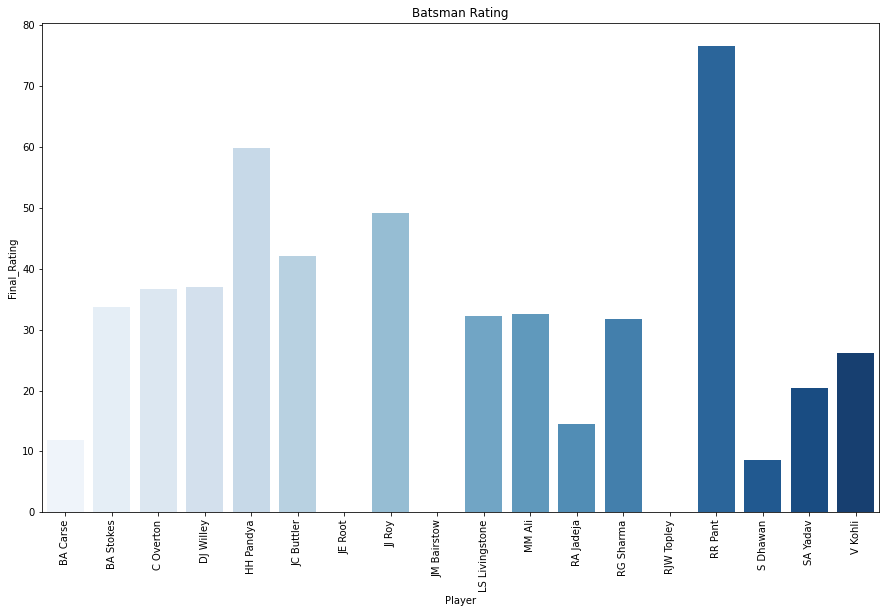

In [30]:
plt.figure(figsize=(15,9)) # initial figure size
sns.barplot(x='Player',y='Final_Rating',data=Batsman_Ratings,palette="Blues") # Barplot
plt.title('Batsman Rating')# Assigning title
plt.xticks(rotation=90) # Rotating the labels
plt.show() #plotting

#### Checking the impact of Runs scored by bat on Final Batsman Rating

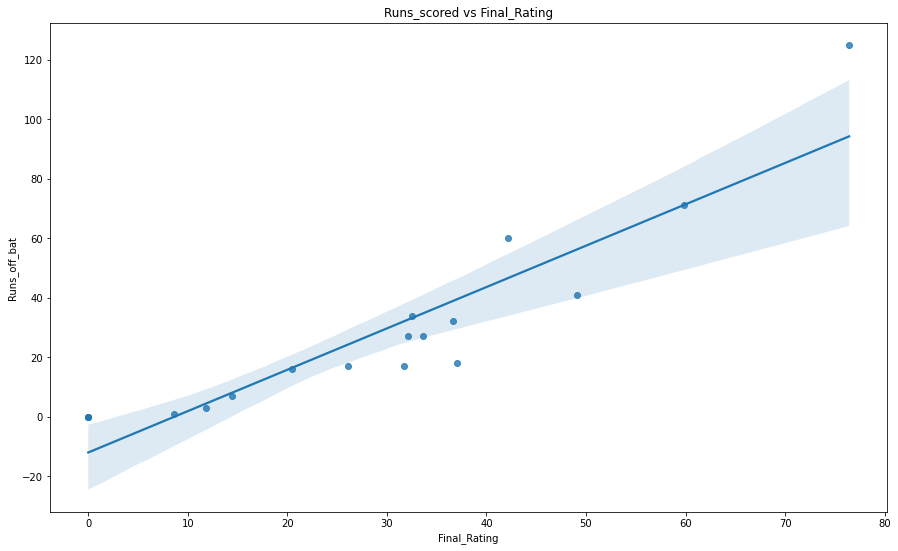

In [31]:
plt.figure(figsize=(15,9))
sns.regplot(y='Runs_off_bat',x='Final_Rating',data=Batsman_Ratings)
plt.title('Runs_scored vs Final_Rating')
plt.show()

#### Checking the correlation for the Batsman_Ratings dataframe (how they are related)

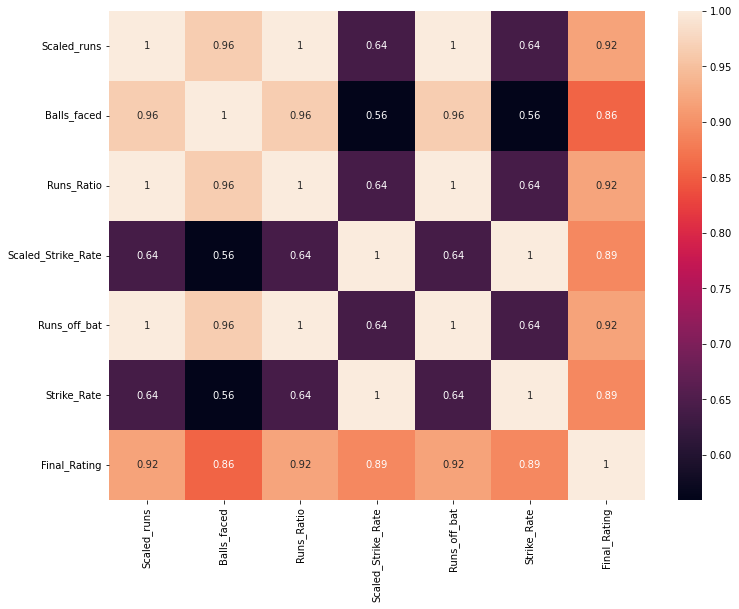

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(Batsman_Ratings.corr(),annot=True)
plt.show()

## Bowling Rating

In [33]:
df3=df.groupby(by=['bowler','Bowling_Team'],as_index=False).agg({"runs_off_bat":'sum','wides':'sum',"noballs":'sum'})
df31=df.groupby(by=['bowler','Bowling_Team'],as_index=False).agg({"runs_off_bat":'count','wides':'count',"noballs":'count'})

In [34]:
# Calculating the 'Runs_conceeded' by the bowler
df3['Runs_conceeded']=df3['runs_off_bat']+df3['wides']+df3['noballs']
df31['Balls_Bowled']=df31['runs_off_bat']-df31['wides']-df31['noballs']

In [35]:
df3.drop(['runs_off_bat','wides','noballs'],axis=1,inplace=True)
df31.drop(['runs_off_bat','wides','noballs'],axis=1,inplace=True)
df3['Runs_conceeded'].astype(int)
df3.head(5)

,bowler,Bowling_Team,Runs_conceeded
0,BA Carse,England,45.0
1,BA Stokes,England,14.0
2,C Overton,England,54.0
3,DJ Willey,England,58.0
4,HH Pandya,India,24.0


In [36]:
df31.head(5)

,bowler,Bowling_Team,Balls_Bowled
0,BA Carse,England,48
1,BA Stokes,England,12
2,C Overton,England,48
3,DJ Willey,England,42
4,HH Pandya,India,42


#### Merging the dataframes to get 'Runs conceeded' and 'Balls Bowled' in same dataframe -> 'Bowler'

In [37]:
#performing inner join
Bowler = pd.merge(df3,df31,on=['bowler','Bowling_Team'],how='inner')

In [38]:
Bowler.head(5)

,bowler,Bowling_Team,Runs_conceeded,Balls_Bowled
0,BA Carse,England,45.0,48
1,BA Stokes,England,14.0,12
2,C Overton,England,54.0,48
3,DJ Willey,England,58.0,42
4,HH Pandya,India,24.0,42


In [39]:
# Calculating the Economy for each bowler across both Teams!
Bowler['Economy']=np.round((Bowler['Runs_conceeded']/Bowler['Balls_Bowled'])*6,2)

In [40]:
Bowler.head(5)

,bowler,Bowling_Team,Runs_conceeded,Balls_Bowled,Economy
0,BA Carse,England,45.0,48,5.62
1,BA Stokes,England,14.0,12,7.00
2,C Overton,England,54.0,48,6.75
3,DJ Willey,England,58.0,42,8.29
4,HH Pandya,India,24.0,42,3.43


#### Filling the Missing Data

In [41]:
df.fillna(0,inplace=True) #Filling using zeros

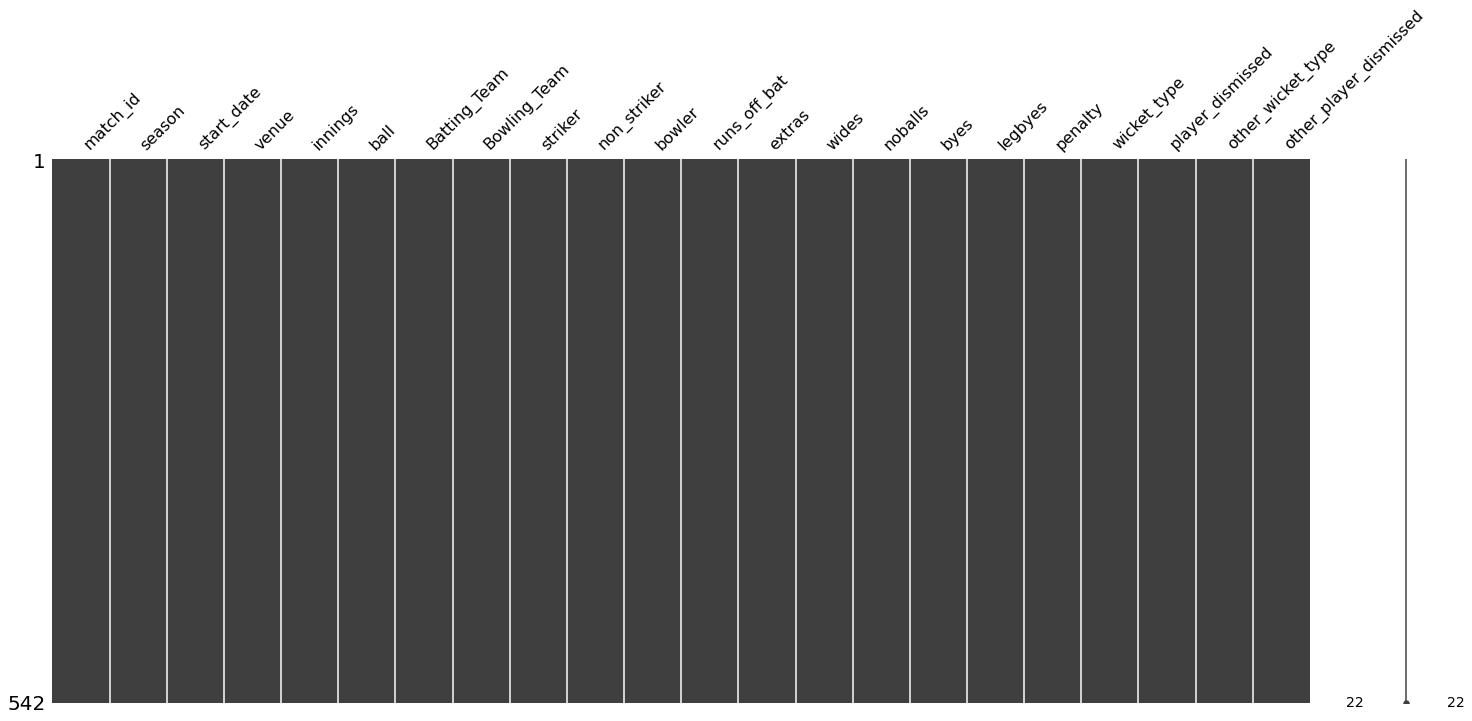

In [42]:
msno.matrix(df) #plotting the graph after filling the missing data
plt.show() 

In [43]:
df.info() # Cross-checking if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                542 non-null    int64  
 1   season                  542 non-null    int64  
 2   start_date              542 non-null    object 
 3   venue                   542 non-null    object 
 4   innings                 542 non-null    int64  
 5   ball                    542 non-null    float64
 6   Batting_Team            542 non-null    object 
 7   Bowling_Team            542 non-null    object 
 8   striker                 542 non-null    object 
 9   non_striker             542 non-null    object 
 10  bowler                  542 non-null    object 
 11  runs_off_bat            542 non-null    int64  
 12  extras                  542 non-null    int64  
 13  wides                   542 non-null    float64
 14  noballs                 542 non-null    fl

In [44]:
Bowler['Wickets_Taken'] = [1,0,1,0,4,0,0,0,0,0,2,1,3,3]

In [45]:
Bowler.head(5)

,bowler,Bowling_Team,Runs_conceeded,Balls_Bowled,Economy,Wickets_Taken
0,BA Carse,England,45.0,48,5.62,1
1,BA Stokes,England,14.0,12,7.00,0
2,C Overton,England,54.0,48,6.75,1
3,DJ Willey,England,58.0,42,8.29,0
4,HH Pandya,India,24.0,42,3.43,4


#### Total wickets taken by each team against the opponent team

In [46]:
Bowler.loc[Bowler['Bowling_Team']=='England','Total_Wickets_taken']= \
Bowler[Bowler['Bowling_Team']=='England']['Wickets_Taken'].sum()
Bowler.loc[Bowler['Bowling_Team']=='India','Total_Wickets_taken']=\
Bowler[Bowler['Bowling_Team']=='India']['Wickets_Taken'].sum()

In [47]:
Bowler['Total_Wickets_taken']=Bowler['Total_Wickets_taken'].astype(int) # Float to int

In [48]:
Bowler['Runs_conceeded']=Bowler['Runs_conceeded'].astype(int) # Float to int

In [49]:
Bowler.head()

,bowler,Bowling_Team,Runs_conceeded,Balls_Bowled,Economy,Wickets_Taken,Total_Wickets_taken
0,BA Carse,England,45,48,5.62,1,5
1,BA Stokes,England,14,12,7.00,0,5
2,C Overton,England,54,48,6.75,1,5
3,DJ Willey,England,58,42,8.29,0,5
4,HH Pandya,India,24,42,3.43,4,10


In [50]:
Bowler.info() #Info about the Bowler Dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bowler               14 non-null     object 
 1   Bowling_Team         14 non-null     object 
 2   Runs_conceeded       14 non-null     int64  
 3   Balls_Bowled         14 non-null     int64  
 4   Economy              14 non-null     float64
 5   Wickets_Taken        14 non-null     int64  
 6   Total_Wickets_taken  14 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 896.0+ bytes


In [51]:
Bowler.describe() #statistical info

,Runs_conceeded,Balls_Bowled,Economy,Wickets_Taken,Total_Wickets_taken
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,36.714286,37.714286,7.189286,1.071429,7.142857
std,19.368605,18.044512,5.010788,1.384768,2.567763
min,4.000000,1.000000,3.430000,0.000000,5.000000
25%,21.750000,28.500000,5.270000,0.000000,5.000000
50%,36.500000,42.000000,5.860000,0.500000,5.000000
75%,52.500000,48.000000,7.000000,1.750000,10.000000
max,66.000000,59.000000,24.000000,4.000000,10.000000


In [52]:
# Calculating the Wicket_Ratio with respect to total wickets taken against opponent
Bowler['Wicket_Ratio']=Bowler['Wickets_Taken']/Bowler['Total_Wickets_taken']

In [53]:
Bowler.head()

,bowler,Bowling_Team,Runs_conceeded,Balls_Bowled,Economy,Wickets_Taken,Total_Wickets_taken,Wicket_Ratio
0,BA Carse,England,45,48,5.62,1,5,0.2
1,BA Stokes,England,14,12,7.00,0,5,0.0
2,C Overton,England,54,48,6.75,1,5,0.2
3,DJ Willey,England,58,42,8.29,0,5,0.0
4,HH Pandya,India,24,42,3.43,4,10,0.4


In [54]:
Bowler['Scaled_Wickets_Ratio']=Bowler['Wicket_Ratio']
Bowler['Scaled_Economy']=Bowler['Economy']

#### Performing Minmaxscaler() to scale wickets_ratio, economy, wickets_taken

In [55]:
from sklearn.preprocessing import MinMaxScaler #import minmaxscaler()

scaler = MinMaxScaler()

def myfunc(Bowler, x): # Function to perform minmaxscaler on each row
    for i in x:
        Bowler[i] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(Bowler[i])))
    return Bowler

In [56]:
Bowler_Ratings = Bowler
Bowler_Ratings = myfunc(Bowler_Ratings,['Scaled_Wickets_Ratio'])

In [57]:
Bowler_Ratings['Scaled_Economy']=np.round((Bowler_Ratings['Economy'] - \
                                           Bowler_Ratings['Economy'].max())/\
                                          (Bowler_Ratings['Economy'].min() - \
                                           Bowler_Ratings['Economy'].max()),2)

In [58]:
Bowler_Ratings['Scaled_Wickets_Ratio']= np.round(Bowler_Ratings['Scaled_Wickets_Ratio'],2)

In [59]:
Bowler_Ratings.head()

,bowler,Bowling_Team,Runs_conceeded,Balls_Bowled,Economy,Wickets_Taken,Total_Wickets_taken,Wicket_Ratio,Scaled_Wickets_Ratio,Scaled_Economy
0,BA Carse,England,45,48,5.62,1,5,0.2,0.33,0.89
1,BA Stokes,England,14,12,7.00,0,5,0.0,0.00,0.83
2,C Overton,England,54,48,6.75,1,5,0.2,0.33,0.84
3,DJ Willey,England,58,42,8.29,0,5,0.0,0.00,0.76
4,HH Pandya,India,24,42,3.43,4,10,0.4,0.67,1.00


### Measuring the 'Bowler Rating'

In [60]:
Bowler_Ratings['Final_Rating']= 100 * np.round(0.33 * Bowler_Ratings['Wicket_Ratio'] + 0.33 * Bowler_Ratings['Scaled_Wickets_Ratio'] + 0.33 * Bowler_Ratings['Scaled_Economy'],2)

In [61]:
Bowler_Ratings.rename(columns={'bowler':'Player','Bowling_Team':'Team'},inplace=True)

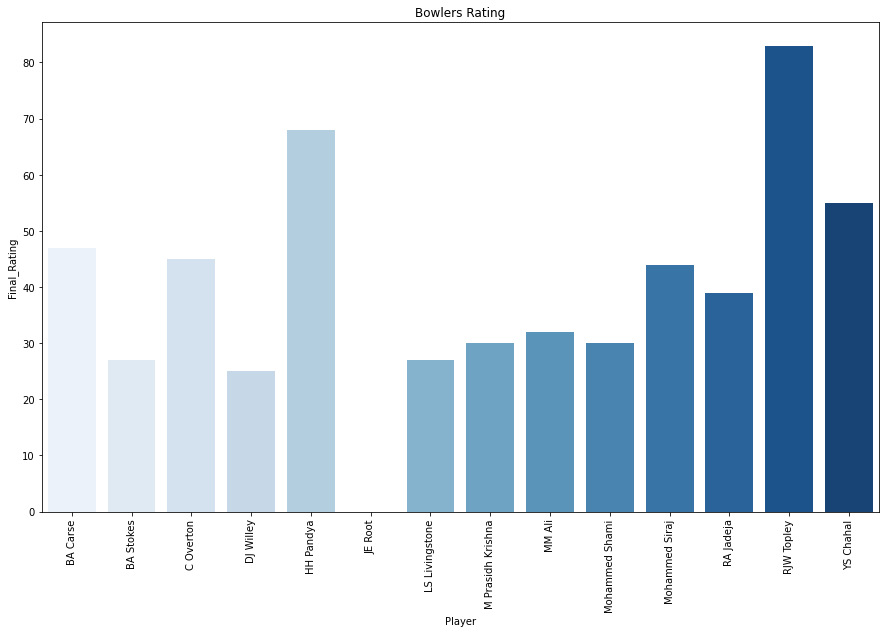

In [62]:
plt.figure(figsize=(15,9)) # initial figure size
sns.barplot(x='Player',y='Final_Rating',data=Bowler_Ratings,palette="Blues") # Barplot
plt.title('Bowlers Rating')# Assigning title
plt.xticks(rotation=90) # Rotating the labels
plt.show() #plotting

### Impact of 'Wickets Taken' on 'Bowler Rating'

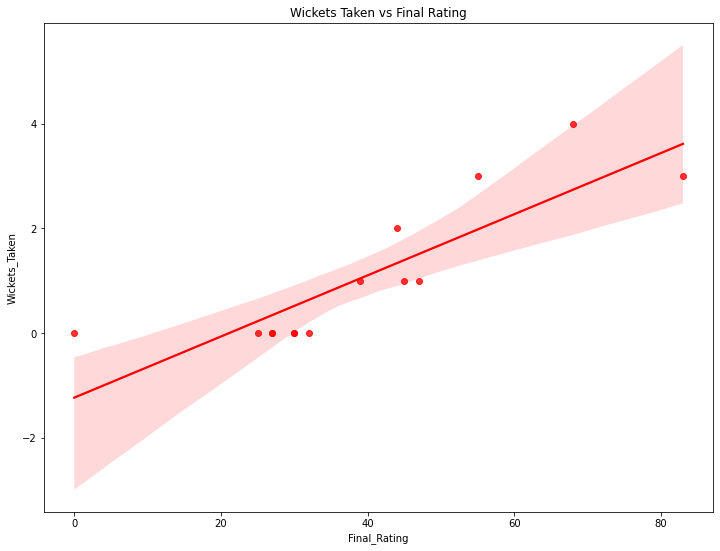

In [63]:
plt.figure(figsize=(12,9))
sns.regplot(y='Wickets_Taken',x='Final_Rating',data=Bowler_Ratings,color='red')
plt.title('Wickets Taken vs Final Rating')
plt.show()

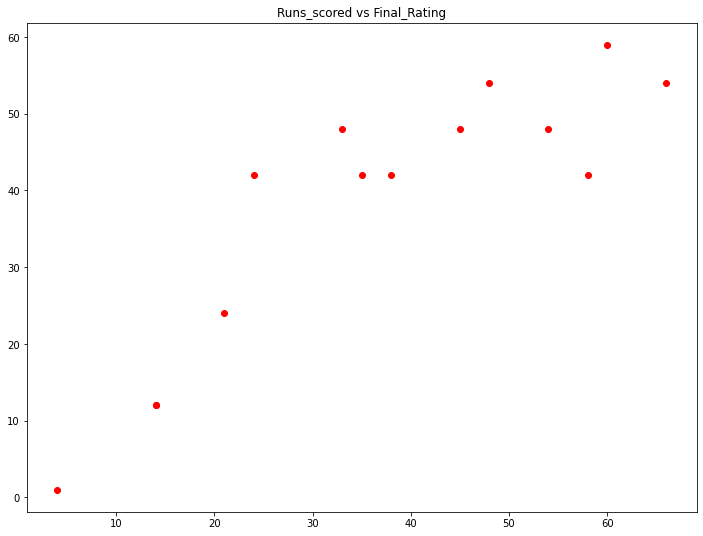

In [64]:
# Runs Conceeded vs Balls Bowled
plt.figure(figsize=(12,9))
plt.scatter(x=Bowler_Ratings['Runs_conceeded'],y=Bowler_Ratings['Balls_Bowled'],c='r')
plt.title('Runs_scored vs Final_Rating')
plt.show()

### Bowlers_Rating Correlation

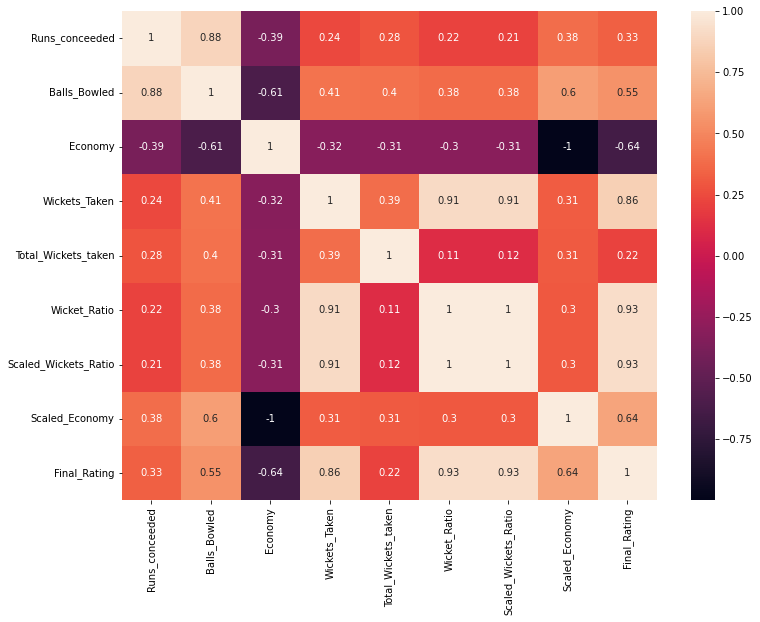

In [65]:
plt.figure(figsize=(12,9))
sns.heatmap(Bowler_Ratings.corr(),annot=True)
plt.show()

##### We can conclude that 'Wickets-Taken' is highly correlated with Bowler rating whereas 'Runs conceeded' is the least 

## CALCULATING OVERALL PLAYER RATING

In [66]:
# Getting all the player names (Bowlers,Strikers) using Concat
df_2 = df[['striker','Batting_Team']].drop_duplicates().reset_index()
df_2.drop('index',axis=1)
df_2.head()

,index,striker,Batting_Team
0,0,JJ Roy,England
1,6,JM Bairstow,England
2,9,JE Root,England
3,15,BA Stokes,England
4,60,JC Buttler,England


In [67]:
df_3 = df[['bowler','Bowling_Team']].drop_duplicates().reset_index()
df_3.drop('index',axis=1)
df_3.head()

,index,bowler,Bowling_Team
0,0,Mohammed Shami,India
1,6,Mohammed Siraj,India
2,49,M Prasidh Krishna,India
3,55,HH Pandya,India
4,104,YS Chahal,India


In [68]:
df_2.rename(columns={'striker':'Player','Batting_Team':'Team'},inplace=True)

In [69]:
df_2.drop('index',axis=1,inplace=True)

In [70]:
df_3.rename(columns={'bowler':'Player','Bowling_Team':'Team'},inplace=True)

In [71]:
df_3.drop('index',axis=1,inplace=True)

In [72]:
df_3.head()

,Player,Team
0,Mohammed Shami,India
1,Mohammed Siraj,India
2,M Prasidh Krishna,India
3,HH Pandya,India
4,YS Chahal,India


In [73]:
Players = pd.concat([df_2,df_3]) #concatenating to get names of all players playing the match

In [74]:
Players.drop_duplicates(inplace=True)

In [75]:
Players.reset_index(drop=True,inplace=True)
Players

,Player,Team
0,JJ Roy,England
1,JM Bairstow,England
2,JE Root,England
3,BA Stokes,England
4,JC Buttler,England
5,MM Ali,England
6,LS Livingstone,England
7,DJ Willey,England
8,C Overton,England
9,BA Carse,England


In [76]:
df_5 = pd.merge(Players,Bowler_Ratings,on=['Player','Team'],how='left')

In [77]:
Overall_Rating = pd.merge(df_5,Batsman_Ratings,on=['Player','Team'],how='left')

In [78]:
#Extracting the required columns
Overall_Player_Rating = Overall_Rating[['Player','Team','Final_Rating_x','Final_Rating_y']]

In [79]:
Overall_Player_Rating.fillna(0).head()

,Player,Team,Final_Rating_x,Final_Rating_y
0,JJ Roy,England,0.0,49.10
1,JM Bairstow,England,0.0,0.00
2,JE Root,England,0.0,0.00
3,BA Stokes,England,27.0,33.66
4,JC Buttler,England,0.0,42.14


In [80]:
Overall_Player_Rating.rename(columns={"Final_Rating_x":'Bowling_Rating',"Final_Rating_y":'Batting_Rating'},inplace=True)

/var/folders/q9/vmdwqts13cj9tk5_rqd7w6pr0000gn/T/ipykernel_96787/4230067499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Overall_Player_Rating.rename(columns={"Final_Rating_x":'Bowling_Rating',"Final_Rating_y":'Batting_Rating'},inplace=True)


In [81]:
Overall_Player_Rating['Player_Rating_for_the_Match'] = Overall_Player_Rating[["Bowling_Rating", "Batting_Rating"]].max(axis=1)

/var/folders/q9/vmdwqts13cj9tk5_rqd7w6pr0000gn/T/ipykernel_96787/1557728663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Overall_Player_Rating['Player_Rating_for_the_Match'] = Overall_Player_Rating[["Bowling_Rating", "Batting_Rating"]].max(axis=1)


In [82]:
Overall_Player_Rating.fillna(0,inplace=True)

/var/folders/q9/vmdwqts13cj9tk5_rqd7w6pr0000gn/T/ipykernel_96787/3149467160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Overall_Player_Rating.fillna(0,inplace=True)


In [83]:
Overall_Player_Rating.head()

,Player,Team,Bowling_Rating,Batting_Rating,Player_Rating_for_the_Match
0,JJ Roy,England,0.0,49.10,49.10
1,JM Bairstow,England,0.0,0.00,0.00
2,JE Root,England,0.0,0.00,0.00
3,BA Stokes,England,27.0,33.66,33.66
4,JC Buttler,England,0.0,42.14,42.14


# Player of the Match with Best Rating

In [84]:
Player_of_the_Match_with_the_Best_Rating = \
Overall_Player_Rating.loc[Overall_Player_Rating['Player_Rating_for_the_Match']==\
                          Overall_Player_Rating['Player_Rating_for_the_Match'].max()]\
[['Player','Team']]

In [85]:
Player_of_the_Match_with_the_Best_Rating

,Player,Team
10,RJW Topley,England


In [86]:
Overall_Player_Rating.loc[Overall_Player_Rating['Team']=='India'][['Player_Rating_for_the_Match']].max()

Player_Rating_for_the_Match    76.44
dtype: float64

In [87]:
Player_of_the_Match_with_the_Best_Rating_for_India = \
Overall_Player_Rating.loc[Overall_Player_Rating['Player_Rating_for_the_Match']==76.44][['Player','Team']]

## Player of the Match with the Best Rating for India

In [88]:
Player_of_the_Match_with_the_Best_Rating_for_India

,Player,Team
14,RR Pant,India


##### Our Predicted player with the Best Rating for India is the 'Player of the Match' (Result) -> RR Pant
##### (Its not Topley since India won the Match)
##### Using Minmaxscaler was a good approach to the problem !!!


 
###### ----------------------------------------------------- THANK YOU -----------------------------------------------------

